# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [30]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient

In [31]:
# Read your api key environment variable
api_key = os.getenv("news_api")
load_dotenv()

True

In [32]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [33]:
# Fetch the Bitcoin news articles
btc = newsapi.get_everything(q="Bitcoin", language="en")
btc["totalResults"]

3459

In [34]:
# Fetch the Ethereum news articles
eth = newsapi.get_everything(q='Ethereum', language='en')
eth['totalResults']

1158

In [35]:
# Create the Bitcoin sentiment scores DataFrame
btc_scores = []
for article in btc['articles']:
    try:
        text =article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_scores.append({'text': text, 'date': date, 'compound': compound, 'positive': pos, 'neutral': neu, 'negative': neg})
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_scores)
btc_df.head()

,compound,date,negative,neutral,positive,text
0,0.0000,2020-10-21T13:28:15Z,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.6808,2020-10-21T19:49:27Z,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
2,-0.7184,2020-10-20T15:40:00Z,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...
3,0.2732,2020-10-21T13:49:00Z,0.071,0.831,0.098,Cryptocurrencies like bitcoin are a fun way to...
4,-0.6597,2020-10-19T15:57:00Z,0.198,0.802,0.000,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...


In [36]:
# organize columns:
btc_df = btc_df[['date', 'text', 'compound', 'positive', 'neutral', 'negative']]
btc_df.head(2)

,date,text,compound,positive,neutral,negative
0,2020-10-21T13:28:15Z,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.0
1,2020-10-21T19:49:27Z,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.838,0.0


In [37]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.165690,0.062300,0.898200,0.039500
std,0.447649,0.055465,0.066488,0.068538
min,-0.718400,0.000000,0.797000,0.000000
25%,0.000000,0.000000,0.839500,0.000000
50%,0.261600,0.070000,0.910000,0.000000
75%,0.507000,0.090000,0.914000,0.044000
max,0.726900,0.186000,1.000000,0.203000


In [38]:
# Create the ethereum sentiment scores DataFrame
eth_scores = []
for article in eth['articles']:
    try:
        text = article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_scores.append({'text': text, 'date': date, 'compound': compound, 'positive': pos, 'neutral': neu, 'negative': neg})
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_scores)
eth_df.head()

,compound,date,negative,neutral,positive,text
0,0.0000,2020-10-21T13:28:15Z,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.0000,2020-10-15T09:44:51Z,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...
2,-0.2960,2020-09-30T20:00:00Z,0.061,0.939,0.000,"September\r\n30, 2020\r\n8 min read\r\nOpinion..."
3,0.6808,2020-10-21T19:49:27Z,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
4,-0.4215,2020-10-14T13:00:00Z,0.132,0.783,0.085,Portions of the global economy melted down in ...


In [39]:
# organize columns:
eth_df = eth_df[['date', 'text', 'compound', 'positive', 'neutral', 'negative']]
eth_df.head(2)

,date,text,compound,positive,neutral,negative
0,2020-10-21T13:28:15Z,PayPal has partnered with cryptocurrency compa...,0.0,0.0,1.0,0.0
1,2020-10-15T09:44:51Z,Breitling is partnering with Arianee to issue ...,0.0,0.0,1.0,0.0


In [40]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,neutral,negative
count,17.000000,17.000000,17.000000,17.000000
mean,0.195735,0.062118,0.924000,0.013882
std,0.359086,0.074981,0.082467,0.035105
min,-0.421500,0.000000,0.751000,0.000000
25%,0.000000,0.000000,0.872000,0.000000
50%,0.000000,0.046000,0.939000,0.000000
75%,0.507000,0.090000,1.000000,0.000000
max,0.912000,0.249000,1.000000,0.132000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin mean positive (0.062300) is almost the same as Ethereum (0.062118)

Q: Which coin had the highest compound score?

A: Eth max compound score is higher than BTC by almost 20%

Q. Which coin had the highest positive score?

A: Eth beats BTC in the positive score with 0.249 & 0.186 respectively.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [41]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [43]:
# Complete the tokenizer function

lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    words=[]
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    sent = sent_tokenize(re_clean)
    for word in sent:
        word = word_tokenize(word)
        words = words + word
    lower_case = [word.lower() for word in words]
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens



In [44]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2020-10-21T13:28:15Z,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.000,"[paypal, ha, partnered, cryptocurrency, compan..."
1,2020-10-21T19:49:27Z,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.838,0.000,"[paypal, rolling, cryptocurrency, support, lat..."
2,2020-10-20T15:40:00Z,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.000,0.846,0.154,"[financial, crimes, enforcement, network, finc..."
3,2020-10-21T13:49:00Z,Cryptocurrencies like bitcoin are a fun way to...,0.2732,0.098,0.831,0.071,"[cryptocurrencies, like, bitcoin, fun, way, sk..."
4,2020-10-19T15:57:00Z,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,-0.6597,0.000,0.802,0.198,"[world, newsalexis, akwagyiramlagos, reuters, ..."


In [45]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2020-10-21T13:28:15Z,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.000,"[paypal, ha, partnered, cryptocurrency, compan..."
1,2020-10-15T09:44:51Z,Breitling is partnering with Arianee to issue ...,0.0000,0.000,1.000,0.000,"[breitling, partnering, arianee, issue, new, k..."
2,2020-09-30T20:00:00Z,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.939,0.061,"[september, min, readopinions, expressed, entr..."
3,2020-10-21T19:49:27Z,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.838,0.000,"[paypal, rolling, cryptocurrency, support, lat..."
4,2020-10-14T13:00:00Z,Portions of the global economy melted down in ...,-0.4215,0.085,0.783,0.132,"[portions, global, economy, melted, emerging, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [46]:
from collections import Counter
from nltk import ngrams

In [49]:
# Generate the Bitcoin N-grams where N=2 #this is where I was stuck

N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('satoshi', 'nakaboto'), 12),
 (('bitcoin', 'btc'), 7),
 (('charsby', 'reuters'), 6),
 (('charsour', 'robot'), 6),
 (('robot', 'colleague'), 6),
 (('colleague', 'satoshi'), 6),
 (('nakaboto', 'writes'), 6),
 (('writes', 'bitcoin'), 6),
 (('every', 'fucking'), 6),
 (('fucking', 'daywelcome'), 6),
 (('daywelcome', 'another'), 6),
 (('another', 'edition'), 6),
 (('edition', 'bitcoin'), 6),
 (('bitcoin', 'today'), 6),
 (('today', 'satoshi'), 6),
 (('nakaboto', 'tell'), 6),
 (('tell', 'whats'), 6),
 (('whats', 'going'), 6),
 (('going', 'bitcoin'), 6),
 (('btc', 'every'), 5)]

In [50]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('charslondon', 'reuters'), 4),
 (('reuters', 'paypal'), 4),
 (('paypal', 'holdings'), 4),
 (('holdings', 'inc'), 4),
 (('joined', 'cryptocurrency'), 4),
 (('cryptocurrency', 'market'), 4),
 (('market', 'wednesday'), 4),
 (('wednesday', 'allowing'), 4),
 (('allowing', 'customer'), 4),
 (('customer', 'buy'), 4),
 (('buy', 'sell'), 4),
 (('sell', 'hold'), 4),
 (('hold', 'bitcoin'), 4),
 (('bitcoin', 'virtual'), 4),
 (('virtual', 'coin'), 4),
 (('coin', 'using'), 4),
 (('using', 'us'), 4),
 (('us', 'digital'), 4),
 (('digital', 'payment'), 4),
 (('inc', 'joined'), 3)]

In [51]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [52]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc_df.text.str.cat())
token_count(all_tokens, 10)

[('bitcoin', 29),
 ('reuters', 15),
 ('satoshi', 12),
 ('nakaboto', 12),
 ('btc', 7),
 ('charsby', 6),
 ('taken', 6),
 ('charsour', 6),
 ('robot', 6),
 ('colleague', 6)]

In [53]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(eth_df.text.str.cat())
token_count(all_tokens, 10)

[('bitcoin', 10),
 ('paypal', 8),
 ('cryptocurrency', 8),
 ('digital', 6),
 ('wednesday', 6),
 ('us', 5),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5),
 ('market', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

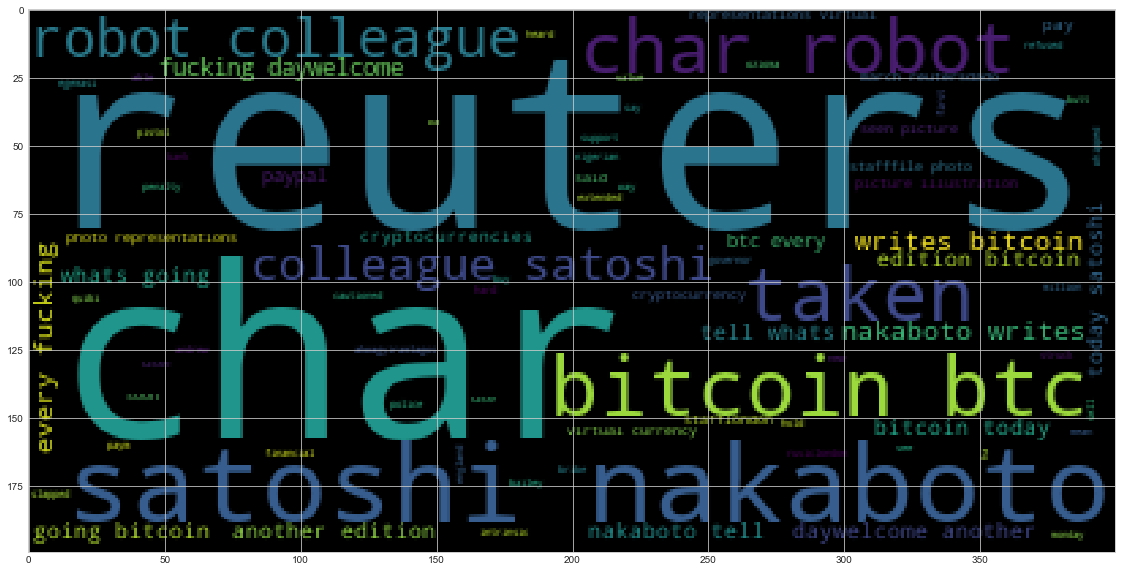

In [57]:
# Generate the Bitcoin word cloud
large_string = ' '.join(btc_df['text'])
finished = tokenizer(large_string)
entering_text = ' '.join(finished)
word_cloud_bitcoin = WordCloud().generate(entering_text)
plt.imshow(word_cloud_bitcoin)

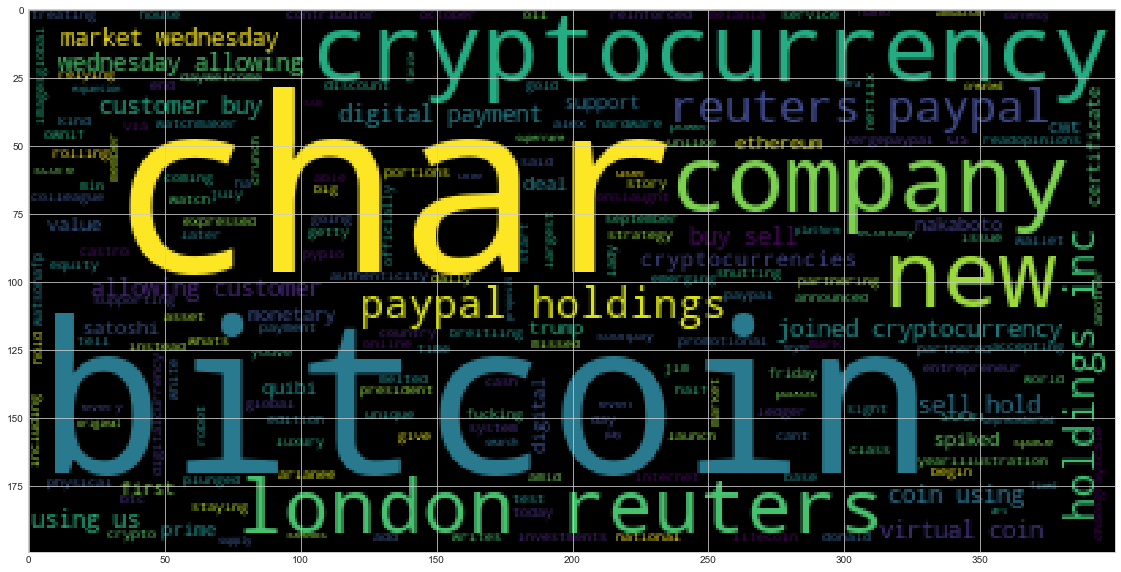

In [58]:
# Generate the Ethereum word cloud
large_string = ' '.join(eth_df['text'])
finished = tokenizer(large_string)
entering_text = ' '.join(finished)
word_cloud_bitcoin = WordCloud().generate(entering_text)
plt.imshow(word_cloud_bitcoin)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [59]:
import spacy
from spacy import displacy

In [60]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [61]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [63]:
# Concatenate all of the bitcoin text together
btc_text = ' '.join(btc_df['text'])

In [64]:
# Run the NER processor on all of the text
btc = nlp(btc_text)

# Add a title to the document
btc.user_data['title'] = 'Bitcoin NER'

In [65]:
# Render the visualization
displacy.render(btc, style='ent')

In [66]:
# List all Entities
for entity in btc.ents:
    print(entity.text, entity.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
The Financial Crimes Enforcement Network ORG
$60 million MONEY
Larry Dean Harmon PERSON
Helix GPE
Coin Ninja ORG
first ORDINAL
Reuters ORG
Beanie Babies WORK_OF_ART
World News WORK_OF_ART
Alexis Akwagyiram PERSON
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
PayPal PRODUCT
305 million CARDINAL
Bitcoin GPE
Angela Lang PERSON
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Dado Ruvic/File Photo ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Reuters ORG
LONDON GPE
Reuters ORG
Bank of England ORG
Andrew Bailey PERSON
Monday

---

## Ethereum NER

In [67]:
# Concatenate all of the bitcoin text together
eth_text = ' '.join(eth_df['text'])

In [68]:
# Run the NER processor on all of the text
eth = nlp(eth_text)

# Add a title to the document
eth.user_data['title'] = 'Ethereum NER'

In [69]:
# Render the visualization
displacy.render(eth, style='ent')

In [70]:
# List all Entities
for entity in eth.ents:
    print(entity.text, entity.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
September DATE
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
2020 DATE
Grayscale Investments ORG
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
US GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
Bitcoin GPE
Wednesday DATE
PayPal ORG
Bit